In [ ]:
!pip install numpy matplotlib

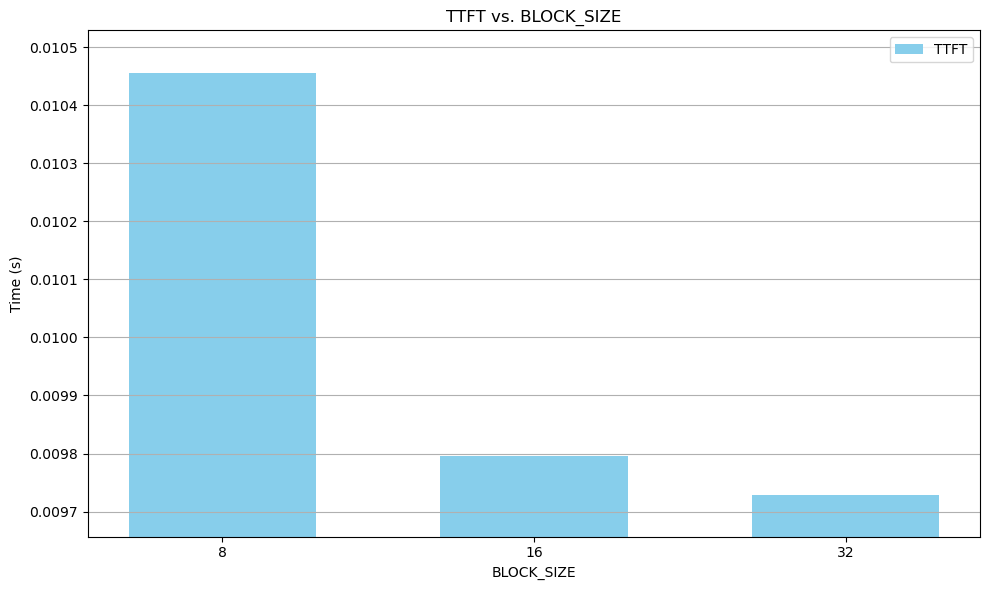

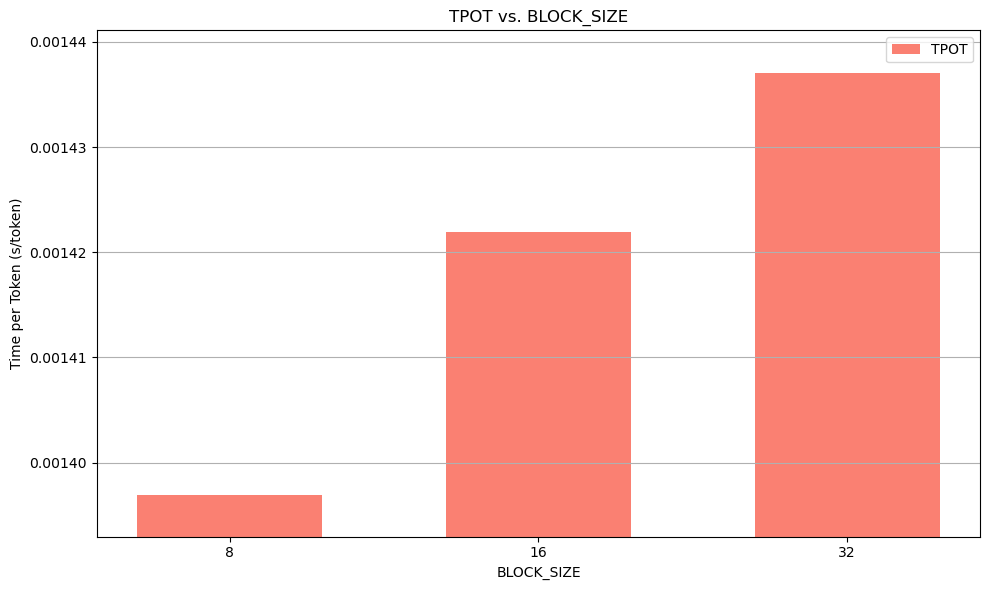

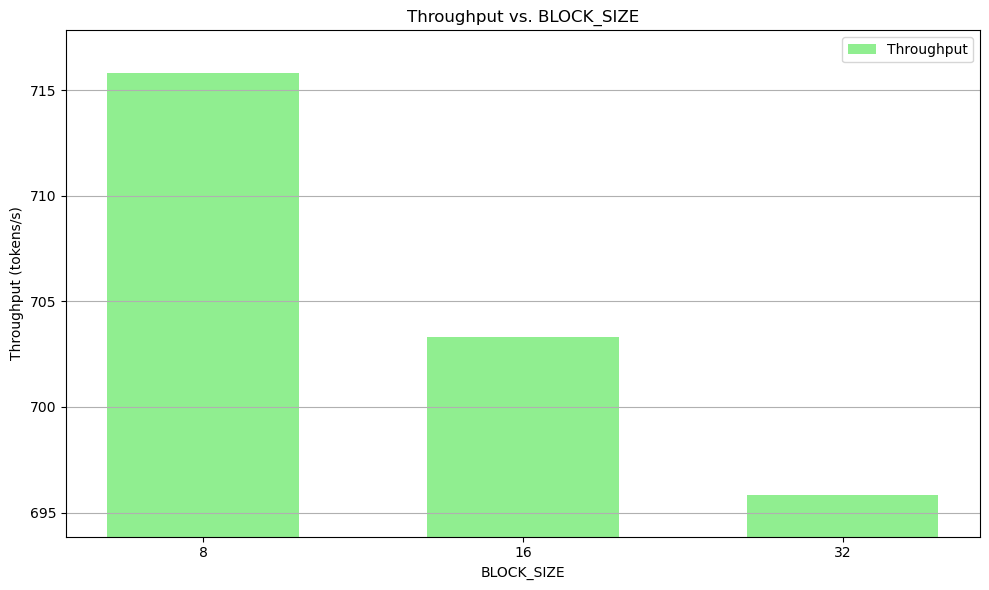

In [ ]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

def parse_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    # Extract relevant metrics using regular expressions
    first_scheduled_time = float(re.search(r"first_scheduled_time=([\d.]+)", content).group(1))
    first_token_time = float(re.search(r"first_token_time=([\d.]+)", content).group(1))
    finished_time = float(re.search(r"finished_time=([\d.]+)", content).group(1))

    # Extract number of tokens
    token_ids_match = re.search(r"token_ids=\(([\d, ]+)\)", content)
    output_tokens = len(token_ids_match.group(1).split(',')) if token_ids_match else 0

    # Calculate TTFT, TPOT, and Throughput
    ttft = first_token_time - first_scheduled_time
    total_output_time = finished_time - first_token_time
    tpot = total_output_time / output_tokens if output_tokens > 0 else 0
    throughput = output_tokens / total_output_time if total_output_time > 0 else 0

    return ttft, tpot, throughput

def process_files(directory):
    results = {}
    for file_name in os.listdir(directory):
        if file_name.startswith('output') and file_name.endswith('.txt'):
            block_size = int(''.join(filter(str.isdigit, file_name)))
            file_path = os.path.join(directory, file_name)
            ttft, tpot, throughput = parse_file(file_path)
            results[block_size] = (ttft, tpot, throughput)
    return results

def calculate_ylim(values, padding_factor=0.1):
    """
    Calculate Y-axis limits with padding.
    """
    v_min, v_max = min(values), max(values)
    if v_min == v_max:  # Handle the case where all values are the same
        return v_min * 0.9, v_max * 1.1
    padding = padding_factor * (v_max - v_min)
    return v_min - padding, v_max + padding

def plot_results(results):
    block_sizes = sorted(results.keys())
    ttft_values = [results[bs][0] for bs in block_sizes]
    tpot_values = [results[bs][1] for bs in block_sizes]
    throughput_values = [results[bs][2] for bs in block_sizes]

    x = np.arange(len(block_sizes))  # X-axis positions for the bars
    width = 0.6  # Width of the bars

    # Calculate Y-axis limits
    ttft_ylim = calculate_ylim(ttft_values)
    tpot_ylim = calculate_ylim(tpot_values)
    throughput_ylim = calculate_ylim(throughput_values)

    # Plot TTFT as a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(x, ttft_values, width, color='skyblue', label='TTFT')
    plt.xlabel('BLOCK_SIZE')
    plt.ylabel('Time (s)')
    plt.title('TTFT vs. BLOCK_SIZE')
    plt.xticks(x, block_sizes)
    plt.ylim(ttft_ylim)  # Set Y-axis limits
    plt.grid(axis='y')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot TPOT as a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(x, tpot_values, width, color='salmon', label='TPOT')
    plt.xlabel('BLOCK_SIZE')
    plt.ylabel('Time per Token (s/token)')
    plt.title('TPOT vs. BLOCK_SIZE')
    plt.xticks(x, block_sizes)
    plt.ylim(tpot_ylim)  # Set Y-axis limits
    plt.grid(axis='y')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot Throughput as a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(x, throughput_values, width, color='lightgreen', label='Throughput')
    plt.xlabel('BLOCK_SIZE')
    plt.ylabel('Throughput (tokens/s)')
    plt.title('Throughput vs. BLOCK_SIZE')
    plt.xticks(x, block_sizes)
    plt.ylim(throughput_ylim)  # Set Y-axis limits
    plt.grid(axis='y')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Use the current directory
current_directory = os.getcwd()

# Process files and plot results
results = process_files(current_directory)
plot_results(results)


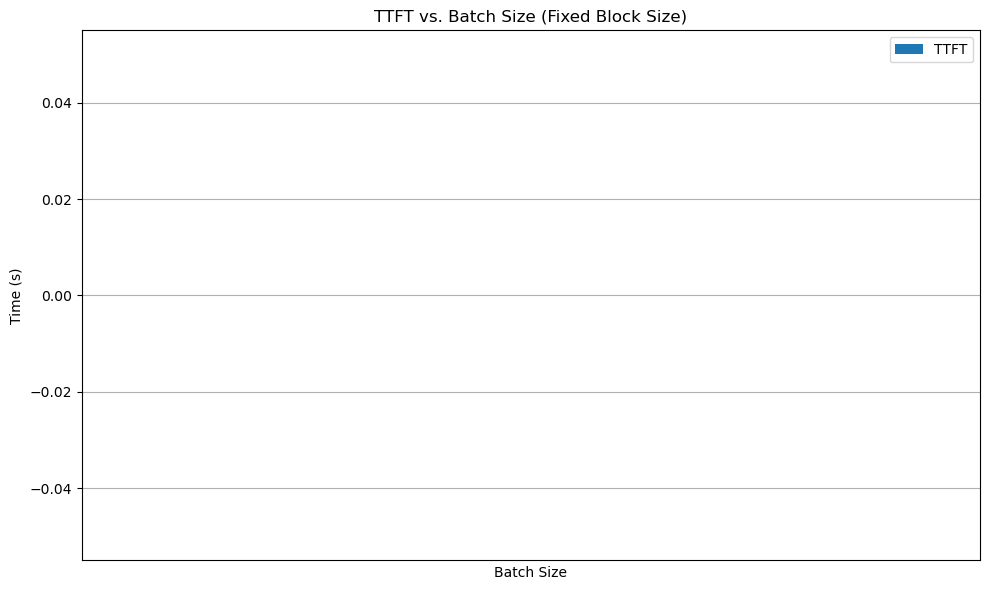

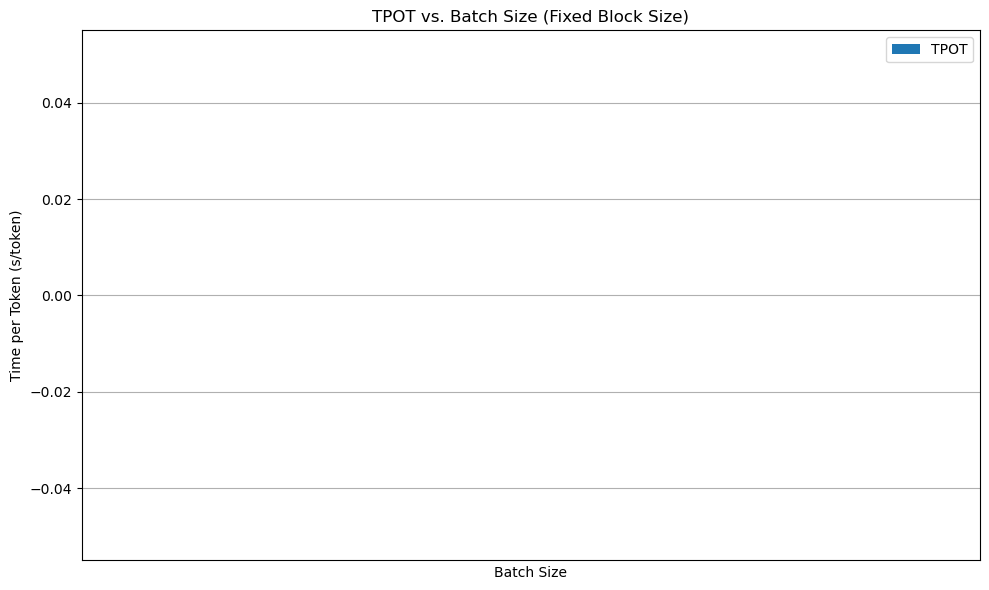

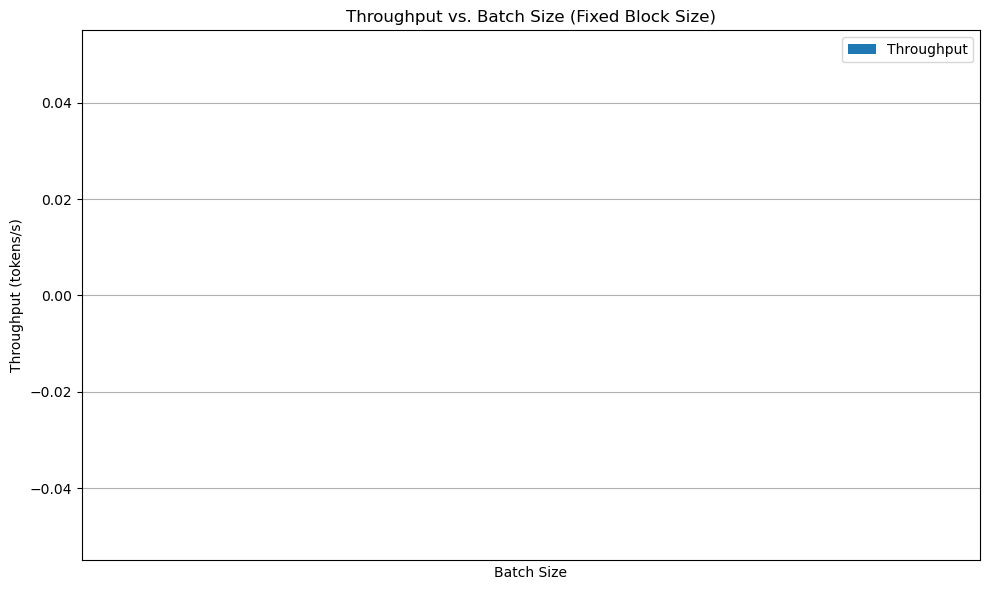

In [3]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

def parse_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    # Extract relevant metrics using regular expressions
    first_scheduled_time = float(re.search(r"first_scheduled_time=([\d.]+)", content).group(1))
    first_token_time = float(re.search(r"first_token_time=([\d.]+)", content).group(1))
    finished_time = float(re.search(r"finished_time=([\d.]+)", content).group(1))

    # Extract number of tokens
    token_ids_match = re.search(r"token_ids=\(([\d, ]+)\)", content)
    output_tokens = len(token_ids_match.group(1).split(',')) if token_ids_match else 0

    # Calculate TTFT, TPOT, and Throughput
    ttft = first_token_time - first_scheduled_time
    total_output_time = finished_time - first_token_time
    tpot = total_output_time / output_tokens if output_tokens > 0 else 0
    throughput = output_tokens / total_output_time if total_output_time > 0 else 0

    return ttft, tpot, throughput

def process_files(directory, fixed_block_size):
    results = {}
    for file_name in os.listdir(directory):
        if file_name.startswith('output') and file_name.endswith('.txt'):
            # Extract batch_size and block_size from the filename
            match = re.match(r"output_batch(\d+)_bs(\d+).txt", file_name)
            if match:
                batch_size = int(match.group(1))
                block_size = int(match.group(2))
                if block_size == fixed_block_size:  # Only process the fixed block size
                    file_path = os.path.join(directory, file_name)
                    ttft, tpot, throughput = parse_file(file_path)
                    results[batch_size] = (ttft, tpot, throughput)
    return results

def plot_results(results):
    batch_sizes = sorted(results.keys())
    ttft_values = [results[bs][0] for bs in batch_sizes]
    tpot_values = [results[bs][1] for bs in batch_sizes]
    throughput_values = [results[bs][2] for bs in batch_sizes]

    x = np.arange(len(batch_sizes))  # X-axis positions for the bars

    # Plot TTFT
    plt.figure(figsize=(10, 6))
    plt.bar(x, ttft_values, color='skyblue', label='TTFT')
    plt.xlabel('Batch Size')
    plt.ylabel('Time (s)')
    plt.title('TTFT vs. Batch Size (Fixed Block Size)')
    plt.xticks(x, batch_sizes)
    plt.grid(axis='y')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot TPOT
    plt.figure(figsize=(10, 6))
    plt.bar(x, tpot_values, color='salmon', label='TPOT')
    plt.xlabel('Batch Size')
    plt.ylabel('Time per Token (s/token)')
    plt.title('TPOT vs. Batch Size (Fixed Block Size)')
    plt.xticks(x, batch_sizes)
    plt.grid(axis='y')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot Throughput
    plt.figure(figsize=(10, 6))
    plt.bar(x, throughput_values, color='lightgreen', label='Throughput')
    plt.xlabel('Batch Size')
    plt.ylabel('Throughput (tokens/s)')
    plt.title('Throughput vs. Batch Size (Fixed Block Size)')
    plt.xticks(x, batch_sizes)
    plt.grid(axis='y')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Use the current directory
current_directory = os.getcwd()
fixed_block_size = 32  # Specify the fixed block size

# Process files and plot results
results = process_files(current_directory, fixed_block_size)
plot_results(results)
